In [2]:
import torch
import numpy as np
from utils import visualize
import matplotlib
import matplotlib.pyplot as plt
%matplotlib widget

In [11]:
def load_pvd_output(filename: str) -> np.ndarray:
    """
    Loads the final output pointcloud of the Point-Voxel CNN from a file.
    """
    return torch.load(filename, map_location=torch.device('cpu')).numpy()[-1,:,:]

airplane = load_pvd_output("airplane_pc_data.pth")
car = load_pvd_output("car_pc_data.pth")
chair = load_pvd_output("chair_pc_data.pth")

In [41]:
def visualize_pointcloud(pc: np.ndarray, title: str = "", output: str = None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d', facecolor="none")
    # Depth color mapping
    depth = pc[:, 2]
    depth_colormap = plt.get_cmap('viridis')
    
    # Plot
    scatter = ax.scatter(pc[:,0], pc[:,1], pc[:,2], c=depth, cmap=depth_colormap)
    
    # Colorbar
    # cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
    # cbar.set_label("Depth")
    
    # Labels
    ax.set_xlabel("Z")
    ax.set_ylabel("X")
    ax.set_zlabel("Y")
    ax.set_title(title)
    
    # Remove background & axis
    
    ax.set_facecolor((0, 0, 0, 0))  # Transparent background
    ax.grid(False)  # No grid
    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # X axis line transparent
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Y axis line transparent
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Z axis line transparent
    ax.set_xticks([])  # No X ticks
    ax.set_yticks([])  # No Y ticks
    ax.set_zticks([])  # No Z ticks
    ax.xaxis.set_ticklabels([])  # No X tick labels
    ax.yaxis.set_ticklabels([])  # No Y tick labels
    ax.zaxis.set_ticklabels([])  # No Z tick labels


    if output is not None:
        fig.savefig(output, transparent=True)

/var/folders/0k/mvfs15g90173v31nmz_k7f480000gn/T/ipykernel_15965/1700495816.py:25: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # X axis line transparent
/var/folders/0k/mvfs15g90173v31nmz_k7f480000gn/T/ipykernel_15965/1700495816.py:26: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Y axis line transparent
/var/folders/0k/mvfs15g90173v31nmz_k7f480000gn/T/ipykernel_15965/1700495816.py:27: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Z axis line transparent


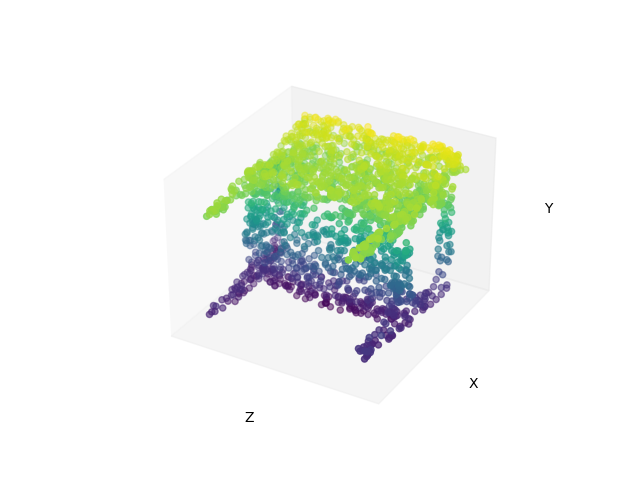

In [42]:
visualize_pointcloud(chair)

In [26]:
plt.savefig("chair.png")